In [1]:
# !pip install transformers datasets scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Load dataset
try:
    data = pd.read_csv('data-final.csv', sep='\t', on_bad_lines='skip')
except FileNotFoundError:
    print("Dataset not found. Please upload the dataset.")
    exit()



In [3]:
data.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706


In [4]:
data.isnull().sum()

,0
EXT1,1783
EXT2,1783
EXT3,1783
EXT4,1783
EXT5,1783
...,...
endelapse,0
IPC,0
country,77
lat_appx_lots_of_err,0


In [5]:
data.shape

(1015341, 110)

In [6]:
data1 = data.dropna()
data1.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706


In [7]:
data1.shape

(1012050, 110)

In [8]:
data1.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,...,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06
mean,2.647892e+00,2.773242e+00,3.288202e+00,3.140699e+00,3.276805e+00,2.401119e+00,2.771527e+00,3.414799e+00,2.963761e+00,3.556569e+00,...,7.691908e+03,5.425333e+03,6.317961e+03,5.338179e+03,1.149365e+03,8.262256e+02,9.599879e+02,6.716907e+02,2.707473e+03,1.042744e+01
std,1.264476e+00,1.323982e+00,1.215083e+00,1.237473e+00,1.277636e+00,1.225812e+00,1.400348e+00,1.271954e+00,1.346053e+00,1.305249e+00,...,5.846318e+05,2.631705e+05,4.300991e+05,4.411506e+05,5.601008e+02,1.802290e+02,5.107085e+04,2.017223e+04,1.486309e+06,3.979830e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.328000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.728000e+03,4.468000e+03,4.784000e+03,3.361000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012050 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 857.1+ MB


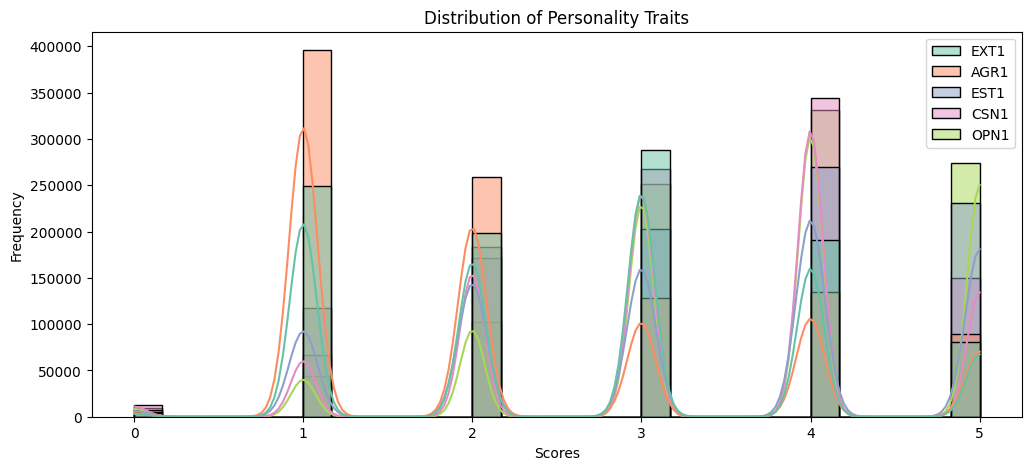

In [10]:
plt.figure(figsize=(12, 5))
sns.histplot(data1[['EXT1', 'AGR1', 'EST1','CSN1', 'OPN1']], kde=True, bins=30, palette="Set2")
plt.title("Distribution of Personality Traits")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Remove all *_E columns
data1 = data1.drop(columns=[col for col in data.columns if col.endswith('_E')])


In [12]:
data1.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706


In [13]:
data1.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'dateload', 'screenw',
       'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country',
       'lat_appx_lots_of_err', 'long_appx_lots_of_err'],
      dtype='object')

In [14]:
data1.shape

(1012050, 60)

In [15]:
data1.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7,OPN8,OPN9,OPN10,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,...,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06
mean,2.647892e+00,2.773242e+00,3.288202e+00,3.140699e+00,3.276805e+00,2.401119e+00,2.771527e+00,3.414799e+00,2.963761e+00,3.556569e+00,...,3.976501e+00,3.182712e+00,4.123180e+00,3.958640e+00,1.149365e+03,8.262256e+02,9.599879e+02,6.716907e+02,2.707473e+03,1.042744e+01
std,1.264476e+00,1.323982e+00,1.215083e+00,1.237473e+00,1.277636e+00,1.225812e+00,1.400348e+00,1.271954e+00,1.346053e+00,1.305249e+00,...,1.008545e+00,1.255386e+00,1.041208e+00,1.034486e+00,5.601008e+02,1.802290e+02,5.107085e+04,2.017223e+04,1.486309e+06,3.979830e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012050 entries, 0 to 1015340
Data columns (total 60 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   EXT1                   1012050 non-null  float64
 1   EXT2                   1012050 non-null  float64
 2   EXT3                   1012050 non-null  float64
 3   EXT4                   1012050 non-null  float64
 4   EXT5                   1012050 non-null  float64
 5   EXT6                   1012050 non-null  float64
 6   EXT7                   1012050 non-null  float64
 7   EXT8                   1012050 non-null  float64
 8   EXT9                   1012050 non-null  float64
 9   EXT10                  1012050 non-null  float64
 10  EST1                   1012050 non-null  float64
 11  EST2                   1012050 non-null  float64
 12  EST3                   1012050 non-null  float64
 13  EST4                   1012050 non-null  float64
 14  EST5                   

In [17]:
data2 = data1.drop(columns=['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
                          'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'])


In [18]:
data2.info()# List of all trait columns from EXT1 to OPN10
trait_columns = [
    f'EXT{i}' for i in range(1, 11)
] + [
    f'EST{i}' for i in range(1, 11)
] + [
    f'AGR{i}' for i in range(1, 11)
] + [
    f'CSN{i}' for i in range(1, 11)
] + [
    f'OPN{i}' for i in range(1, 11)
]

# Create a text_column by combining all trait responses into a string
data2['text_column'] = data2[trait_columns].astype(str).agg(' '.join, axis=1)


<class 'pandas.core.frame.DataFrame'>
Index: 1012050 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1012050 non-null  float64
 1   EXT2    1012050 non-null  float64
 2   EXT3    1012050 non-null  float64
 3   EXT4    1012050 non-null  float64
 4   EXT5    1012050 non-null  float64
 5   EXT6    1012050 non-null  float64
 6   EXT7    1012050 non-null  float64
 7   EXT8    1012050 non-null  float64
 8   EXT9    1012050 non-null  float64
 9   EXT10   1012050 non-null  float64
 10  EST1    1012050 non-null  float64
 11  EST2    1012050 non-null  float64
 12  EST3    1012050 non-null  float64
 13  EST4    1012050 non-null  float64
 14  EST5    1012050 non-null  float64
 15  EST6    1012050 non-null  float64
 16  EST7    1012050 non-null  float64
 17  EST8    1012050 non-null  float64
 18  EST9    1012050 non-null  float64
 19  EST10   1012050 non-null  float64
 20  AGR1    1012050 non-null  flo

In [19]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import os
import nltk

nltk.data.path.append('/root/nltk_data')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # URLs
    text = re.sub(r'\@w+|\#','', text)  # mentions & hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stop_words])

data2['clean_text'] = data2['text_column'].apply(clean_text)


In [21]:
data2.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,text_column,clean_text
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,4.0 1.0 5.0 2.0 5.0 1.0 5.0 2.0 4.0 1.0 1.0 4....,
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3.0 5.0 3.0 4.0 3.0 3.0 2.0 5.0 1.0 5.0 2.0 3....,


In [22]:
# Convert all personality columns to numeric
columns = [f'OPN{i}' for i in range(1, 11)] + \
          [f'CSN{i}' for i in range(1, 11)] + \
          [f'EXT{i}' for i in range(1, 11)] + \
          [f'AGR{i}' for i in range(1, 11)] + \
          [f'EST{i}' for i in range(1, 11)]

# Apply conversion
data2[columns] = data2[columns].apply(pd.to_numeric, errors='coerce')


In [23]:
data2['O'] = data2[[f'OPN{i}' for i in range(1, 11)]].mean(axis=1)
data2['C'] = data2[[f'CSN{i}' for i in range(1, 11)]].mean(axis=1)
data2['E'] = data2[[f'EXT{i}' for i in range(1, 11)]].mean(axis=1)
data2['A'] = data2[[f'AGR{i}' for i in range(1, 11)]].mean(axis=1)
data2['N'] = data2[[f'EST{i}' for i in range(1, 11)]].mean(axis=1)


In [24]:
data2.head(2)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8,OPN9,OPN10,text_column,clean_text,O,C,E,A,N
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,4.0,5.0,4.0 1.0 5.0 2.0 5.0 1.0 5.0 2.0 4.0 1.0 1.0 4....,,3.3,3.2,3.0,3.1,2.4
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,5.0,3.0,3.0 5.0 3.0 4.0 3.0 3.0 2.0 5.0 1.0 5.0 2.0 3....,,2.7,3.1,3.4,3.2,2.1


In [25]:
data2.shape

(1012050, 57)

In [26]:
# Final columns
df = data2[['clean_text', 'O', 'C', 'E', 'A', 'N']]
df = df.reset_index(drop=True)

In [27]:
df.head(2)

,clean_text,O,C,E,A,N
0,,3.3,3.2,3.0,3.1,2.4
1,,2.7,3.1,3.4,3.2,2.1


In [28]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

texts = df['clean_text'].tolist()
labels = df[['O', 'C', 'E', 'A', 'N']].values.tolist()

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [29]:
import torch
from torch.utils.data import Dataset

class OceanDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float)

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = OceanDataset(train_encodings, train_labels)
val_dataset = OceanDataset(val_encodings, val_labels)


In [30]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=5,
    problem_type="multi_label_classification"
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    report_to="none"  # disables Hugging Face Hub logging
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
def predict_personality(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.sigmoid(outputs.logits).numpy()[0]
    traits = ['O', 'C', 'E', 'A', 'N']
    return {trait: int(p > 0.5) for trait, p in zip(traits, probs)}
predict_personality("I enjoy planning and organizing events with friends.")
